<a href="https://colab.research.google.com/github/narayan-bhattarai/PredictDiabetes/blob/main/DiabetesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
## Load dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, mean_squared_error
from itertools import cycle
import seaborn as sns

In [30]:
# Load dataset
data = load_diabetes()
X, y = data.data, data.target

In [31]:
# Display 5 feature names and target values for a sample instance
for i in range(5):
  print("Sample features:", X[i])
  print("Sample target:", y[i])

Sample features: [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
Sample target: 151.0
Sample features: [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06833155 -0.09220405]
Sample target: 75.0
Sample features: [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
 -0.03235593 -0.00259226  0.00286131 -0.02593034]
Sample target: 141.0
Sample features: [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
 -0.03603757  0.03430886  0.02268774 -0.00936191]
Sample target: 206.0
Sample features: [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
  0.00814208 -0.00259226 -0.03198764 -0.04664087]
Sample target: 135.0


In [32]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [34]:
# Split into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Train KNN Regression Model (K=5)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [36]:
# Predict on test data
y_pred = knn_model.predict(X_test)

In [37]:
# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 3222.12


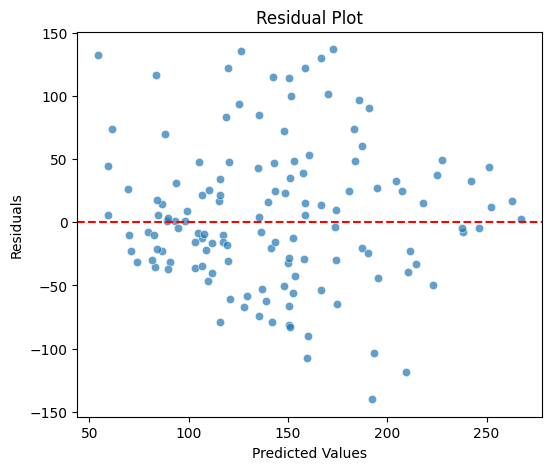

In [38]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

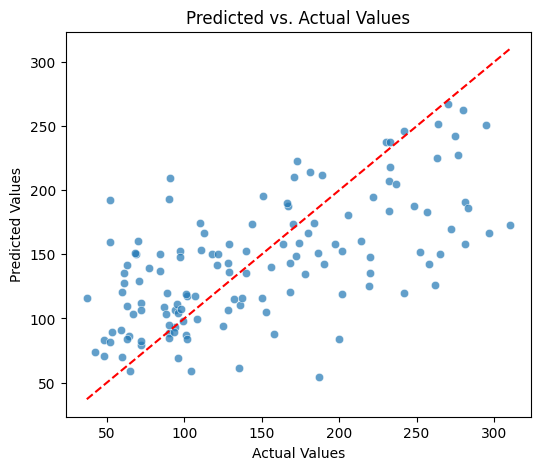

In [43]:
# Predicted vs. Actual Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [40]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 56.76


In [44]:
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Mean Cross-Validation MSE: {cv_mse:.2f}")

Cross-Validation MSE Scores: [3167.19191011 4022.18067416 3556.56681818 3551.07136364 3807.57      ]
Mean Cross-Validation MSE: 3620.92


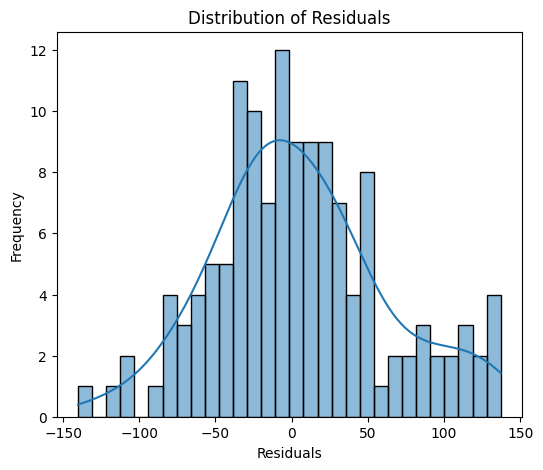

In [45]:
#Histogram of Residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


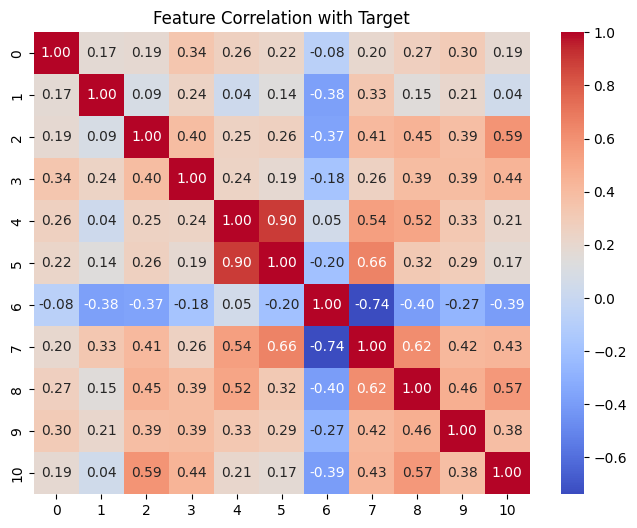

In [47]:
# Hyperparameter Tuning
plt.figure(figsize=(8, 6))
sns.heatmap(np.corrcoef(X.T, y), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation with Target")
plt.show()
